`March, 21st 2022`

### **Multiple Linear Regression, Diagnostics, Multicollinearity, Dummy Variables**

<hr>

**- Bulid a regression model using mpg dataset from seaborn, mpg as the dependent variable**

**- Analyze the relationship**

**- Use α 5% for hypothesis testing**

**- Check RMSE value**

**- Interpret the result of model summary**


<hr>


### **Import libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### **Load dataset**

`The data is about city-cycle car fuel consumption in miles per gallon.`

In [2]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### **Data Exploration**

In [3]:
# Check dataset info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
# Handling missing value. At the moment, just simply drop the rows with missing values.
df = df.dropna()

In [5]:
# Reheck dataset info after dropping some rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


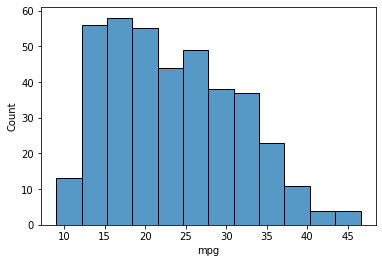

In [6]:
# Check data distribution of mpg.
sns.histplot(df['mpg']);

### **Multiple Linear Regression**

In [7]:
# For modeling purpose, drop feature 'name' since it is not relevant to the label.
df.drop(columns='name', inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [8]:
# Create dummy variable for a categorical variable
df_mpg = pd.get_dummies(df, drop_first=True)
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,1


In [9]:
# Define X and y
X = df_mpg.drop(columns=['mpg'])
y = df_mpg['mpg']

In [10]:
# Check X data
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,70,0,1
1,8,350.0,165.0,3693,11.5,70,0,1
2,8,318.0,150.0,3436,11.0,70,0,1
3,8,304.0,150.0,3433,12.0,70,0,1
4,8,302.0,140.0,3449,10.5,70,0,1


In [11]:
# Check y data
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [12]:
# Build a multiple regression model
sm_lm = sm.OLS(y, sm.add_constant(X))
result = sm_lm.fit()

In [13]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          1.79e-139
Time:                        14:49:29   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.3246      4.602     -3.330   

#### **Check the assumptions**

**1. Normality assumption**

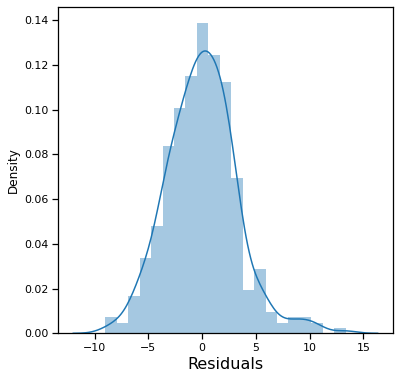

In [14]:
# Histogram of residuals
plt.figure(figsize=(6, 6))
sns.set_context('notebook', font_scale=1)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize=16);

In [15]:
# Check skewness
result.resid.skew()

0.4453736189522271

`Interpretation`

- Skewness < -1 or > 1, the distribution is highly skewed. 
- Skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. 
- Skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

According to the classification above, the residuals are approximately symmetric.

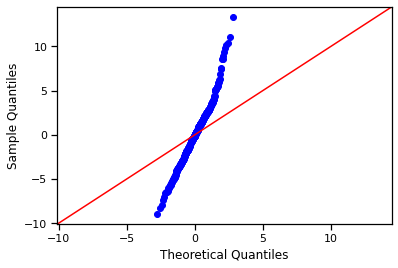

In [16]:
# Validate the normality by checking it using QQ-plot
sm.qqplot(result.resid, line='45');

In [17]:
# Since the results are contradictive, we validate again using a frequentist test.

from scipy.stats import normaltest
dp_statistic, dp_pvalue = normaltest(result.resid)

if dp_pvalue > 0.05:
    print(f'P-value: {dp_pvalue}. So, we assume residuals follow a normal distribution')
else:
    print(f'P-value: {dp_pvalue}. So, we do not assume residuals follow a normal distribution')

P-value: 8.315041193527872e-06. So, we do not assume residuals follow a normal distribution


**2. Gauss-Markov assumptions**

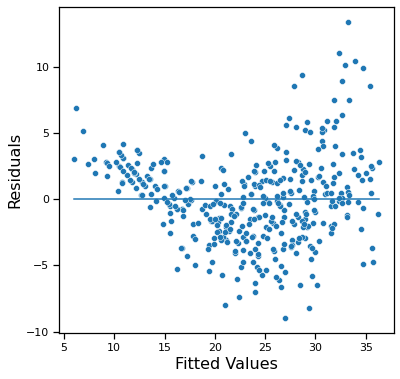

In [18]:
# Scatter plot of fitted values & residuals.
plt.figure(figsize=(6, 6))
sns.set_context('notebook', font_scale=1)
sns.scatterplot(result.fittedvalues, result.resid)
sns.lineplot(result.fittedvalues, 0)
plt.xlabel('Fitted Values', fontsize=16)
plt.ylabel('Residuals', fontsize=16);

In [19]:
# Check maximum number of label.
y.max()

46.6

In [20]:
# Check maximum number of predicted values.
result.fittedvalues.max()

36.27875966117472

`Interpretation of assumptions`

1. Residuals do not normally distributed.
2. Model residuals do not gather around zero.
3. It seems residuals have like 'y = cos x' pattern.
4. Heteroscedasticity occur.

Since the assumptions are not met, we can't use the linear regression model OLS based on this case. However, for the sake of this exercise, we put aside the results above.

#### **Interpretation of the model**

* F-statistic value is used to define if there is a statistically significant influence between the dependent variable (mpg) and the independent variables. Do the features influence mpg?

* According to the probability value (Prob (F-statistic)), we found that the p-value is less than 0.05, which is 1.79e-139. Therefore, we can say that we reject the null hypothesis that there is no significant influence between features and mpg. In other words, based on the statistical test, there is enough evidence that states at least one of the feature influences mpg value.

* P>|t| = 0.000, is the partial test value (T-test). Some of the features have p-value > 0.05. This indicates that it does not matter whether we use these features or not since they are not significant to the label. 

* Adj. R-squared = 0.821 means this model can explain about 82.1% variance of mpg value. But, the question is, do we face a multicollinearity problem?

**Multicollinearity**

In [21]:
# Function for calculating VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['Acceptable'] = vif['VIF'].apply(lambda x: 'Yes' if x <= 4 else 'No')

    return(vif)

In [22]:
calc_vif(X)

,Feature,VIF,Acceptable
0,cylinders,117.144239,No
1,displacement,101.522274,No
2,horsepower,65.199130,No
3,weight,141.294420,No
4,acceleration,69.569829,No
5,model_year,119.151391,No
6,origin_japan,2.301294,Yes
7,origin_usa,7.152934,No


In [23]:
# Check correlation of features.
X.corr(method='spearman')

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
cylinders,1.000000,0.913566,0.816188,0.875972,-0.476266,-0.331087,-0.419605,0.622349
displacement,0.913566,1.000000,0.876171,0.945630,-0.499403,-0.306582,-0.506861,0.715937
horsepower,0.816188,0.876171,1.000000,0.878819,-0.658142,-0.389498,-0.348411,0.519456
weight,0.875972,0.945630,0.878819,1.000000,-0.405109,-0.280981,-0.475689,0.627426
acceleration,-0.476266,-0.499403,-0.658142,-0.405109,1.000000,0.278306,0.144291,-0.236509
model_year,-0.331087,-0.306582,-0.389498,-0.280981,0.278306,1.000000,0.198407,-0.135649
origin_japan,-0.419605,-0.506861,-0.348411,-0.475689,0.144291,0.198407,1.000000,-0.648583
origin_usa,0.622349,0.715937,0.519456,0.627426,-0.236509,-0.135649,-0.648583,1.000000


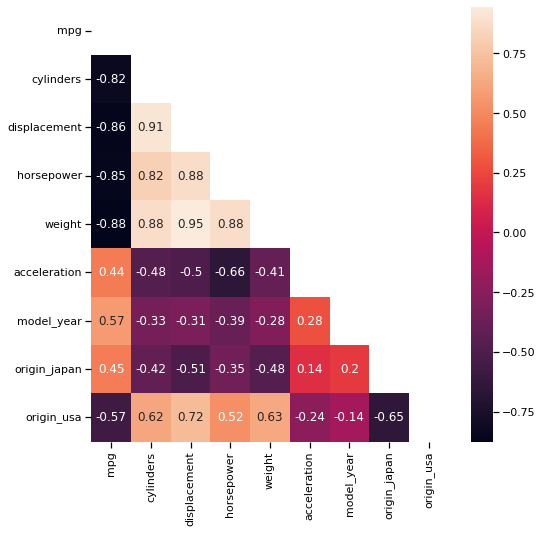

In [24]:
# Check correlation of features through a heatmap.
corr = df_mpg.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 8))
sns.heatmap(corr, mask=mask, annot=True);

In [25]:
# Rebuild the model.
X_new = df_mpg[['horsepower', 'model_year']]

# Build a multiple regression model
sm_lm_new = sm.OLS(y, sm.add_constant(X_new))
result_new = sm_lm_new.fit()

In [26]:
print(result_new.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     423.9
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           1.94e-98
Time:                        14:49:31   Log-Likelihood:                -1134.5
No. Observations:                 392   AIC:                             2275.
Df Residuals:                     389   BIC:                             2287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.7392      5.349     -2.382      0.0

In [27]:
calc_vif(X_new)

,Feature,VIF,Acceptable
0,horsepower,7.445679,No
1,model_year,7.445679,No


**RMSE**

In [31]:
np.sqrt(mean_squared_error(y, result_new.predict()))

4.371505892451583

**Conclusion**

Considering VIF value and partial test result of using 'horsepower' and 'model_year' features can explain 68.4% of mpg variance and with RMSE of 4.37. The VIF values are still acceptable if we use 10 as the threshold.